In [30]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
from datetime import datetime

# portfolio tickers


def get_ticker_data(ticker):
    local_fn = f"./{ticker.lower()}_hist.csv"
    if not os.path.isfile(local_fn):
        print('Reading from YF')
        t = yf.Ticker(ticker)
        data_hist = t.history(period='10y')
        data_hist.to_csv(local_fn)
        return data_hist.reset_index()
    else:
        print(f'Reading from local cache {local_fn}')
        data =  pd.read_csv(local_fn)
        return data.reset_index()


def get_div_ret(ticker, remove_friday=False):
        stock_hist = get_ticker_data(ticker)
        
        stock_hist.set_index('Date', inplace=True)
        stock_hist = stock_hist.sort_index(ascending=False)
        stock_hist_shifted = stock_hist.shift(1)

        stock_hist_m = stock_hist.merge(stock_hist_shifted, on=['Date'], suffixes=['', '_shifted'])
        stock_hist_m = stock_hist_m.reset_index()
        # drop rows where div is 0.0. The assumption is that dividend date is the exdate
        shm = stock_hist_m[stock_hist_m.Dividends > 0]
        shm['weekday'] = shm.Date.apply(lambda x: pd.to_datetime(x).isoweekday())
        
        if remove_friday:
            shm = shm[shm['weekday'] != 5]

        shm['min_ret'] = shm.apply(lambda row: row.Low_shifted - row.High + row.Dividends, axis=1)
        shm['open_close_ret'] = shm.apply(lambda row: row.Open_shifted - row.Close + row.Dividends, axis=1)

        shm.to_csv(f'./{ticker}_div_ret.csv')
        return shm

In [35]:
import matplotlib.pyplot as plt
div = get_div_ret('VZ', remove_friday=True)
div

Reading from YF


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Open_shifted,High_shifted,Low_shifted,Close_shifted,Volume_shifted,Dividends_shifted,Stock Splits_shifted,weekday,min_ret,open_close_ret
135,2023-04-06 00:00:00-04:00,37.994336,38.263661,37.667296,37.975098,21546600,0.653,0.0,37.715389,37.850052,37.503777,37.850052,16114300.0,0.0,0.0,4,-0.106884,0.393291
196,2023-01-09 00:00:00-05:00,39.154678,39.429080,39.088443,39.145214,23062200,0.653,0.0,39.135748,39.722405,38.955964,39.694019,16695300.0,0.0,0.0,1,0.179884,0.643534
260,2022-10-06 00:00:00-04:00,36.769345,36.946343,35.185663,35.250874,36663300,0.653,0.0,35.055242,35.120452,34.291349,34.328609,31838700.0,0.0,0.0,4,-2.001994,0.457368
324,2022-07-07 00:00:00-04:00,46.686359,46.777975,46.136678,46.457325,13617100,0.640,0.0,46.283262,46.649715,46.182487,46.255779,13959200.0,0.0,0.0,4,0.044511,0.465937
385,2022-04-07 00:00:00-04:00,47.454380,47.933898,47.083430,47.653423,22790600,0.640,0.0,47.707712,48.567229,47.499619,48.431515,24852200.0,0.0,0.0,4,0.205720,0.694288
511,2021-10-07 00:00:00-04:00,47.729700,48.003499,47.544223,47.606049,18069600,0.640,0.0,47.579545,47.667870,47.005448,47.023113,21384600.0,0.0,0.0,4,-0.358051,0.613497
575,2021-07-08 00:00:00-04:00,48.662106,48.862864,48.487532,48.601006,18384000,0.628,0.0,48.618463,49.081079,48.548633,48.941422,13757000.0,0.0,0.0,4,0.313769,0.645458
638,2021-04-08 00:00:00-04:00,50.098160,50.175845,49.657943,49.718365,16472400,0.628,0.0,49.718366,49.891000,49.416259,49.623421,13872000.0,0.0,0.0,4,-0.131586,0.628002
700,2021-01-07 00:00:00-05:00,49.761324,50.179771,49.599069,49.983356,19079900,0.628,0.0,49.727166,49.838184,48.992744,49.359955,28411600.0,0.0,0.0,4,-0.559027,0.371809
762,2020-10-08 00:00:00-04:00,49.952448,50.467858,49.825710,50.011593,14266400,0.628,0.0,50.062290,50.307322,49.918653,50.129887,9846200.0,0.0,0.0,4,0.078796,0.678698


<Axes: >

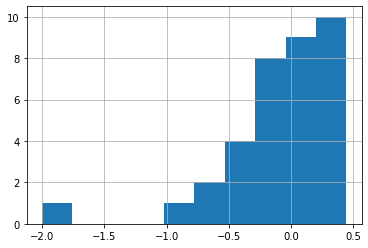

In [36]:
div.min_ret.hist()

<Axes: >

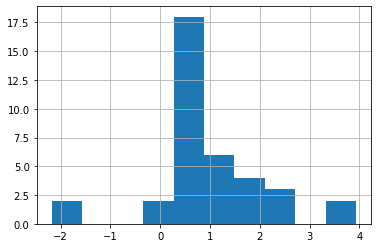

In [34]:
div.open_close_ret.hist()

In [37]:
div.min_ret.mean()

-0.06943394181402854

In [9]:
div.open_close_ret.mean()

0.5766562107427297

In [11]:
div.min_ret.sum()

-2.5786690762804065

In [12]:
div.open_close_ret.sum()

23.066248429709187

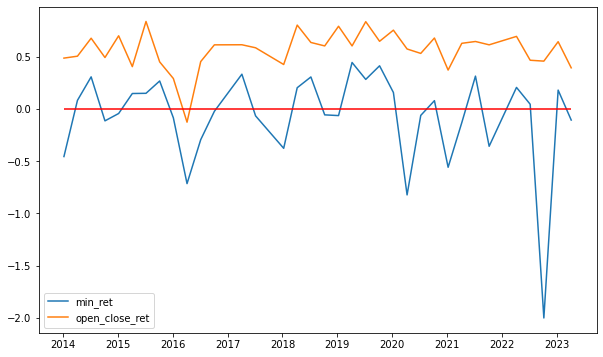

In [38]:
div1 = div.reset_index()

fig= plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(div1.Date, div1.min_ret, label="min_ret")
ax.plot(div1.Date, div1.open_close_ret, label="open_close_ret")
ax.hlines(y=0, xmin=div1.Date[0], xmax=div1.Date[div1.shape[0]-1], color='red')
plt.legend()
plt.show()

In [14]:
d = datetime.strptime('2020-03-13', '%Y-%m-%d')
d.isoweekday()

5